In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [31]:
benchmarks_file = '../implementation/results/experiment-3.json'
with open(benchmarks_file) as d:
    benchmarks = json.load(d)

In [32]:
plot_points_linear = []
for benchmark in benchmarks:
    client = benchmark['type']
    chain_size = benchmark['chainSize'] / 365    
    bytesTransferred = benchmark['bytesDownloaded'] + benchmark['bytesUploaded']
    timeToSync = benchmark['timeToSync'] / 1000
    n = benchmark['batchSize' if client != 'superlight' else 'treeDegree']
    plot_points_linear.append([client, chain_size, bytesTransferred, timeToSync, n])

In [33]:
points_df = pd.DataFrame(plot_points_linear, columns=['client', 'chain_size', 'bytesTransferred', 'timeToSync', 'n'])
points_df_mean = points_df.groupby(['client', 'chain_size', 'n']).mean().reset_index()

In [34]:
points_df_mean

,client,chain_size,n,bytesTransferred,timeToSync
0,optimisticlight,1.873973,20,714238.2,15.8910
1,optimisticlight,1.873973,50,705185.0,10.7132
2,optimisticlight,1.873973,100,719300.0,8.8892
3,optimisticlight,1.873973,200,784665.8,8.4380
4,optimisticlight,1.873973,500,1110908.0,8.3552
5,optimisticlight,3.747945,20,872980.8,22.9004
6,optimisticlight,3.747945,50,815494.4,13.4058
7,optimisticlight,3.747945,100,846598.2,10.7478
8,optimisticlight,3.747945,200,850681.6,8.8496
9,optimisticlight,3.747945,500,1182787.2,8.5678


In [42]:
op_df = points_df_mean[points_df_mean['client'] == 'optimisticlight']
op_df_20 = op_df[points_df_mean['n'] == 20]
slc_bt_20 = op_df_20['bytesTransferred']
slc_tos_20 = op_df_20['timeToSync']
slc_chain_size_20 = op_df_20['chain_size']

op_df = points_df_mean[points_df_mean['client'] == 'optimisticlight']
op_df_50 = op_df[points_df_mean['n'] == 50]
slc_bt_50 = op_df_50['bytesTransferred']
slc_tos_50 = op_df_50['timeToSync']
slc_chain_size_50 = op_df_50['chain_size']

op_df = points_df_mean[points_df_mean['client'] == 'optimisticlight']
op_df_100 = op_df[points_df_mean['n'] == 100]
slc_bt_100 = op_df_100['bytesTransferred']
slc_tos_100 = op_df_100['timeToSync']
slc_chain_size_100 = op_df_100['chain_size']

op_df = points_df_mean[points_df_mean['client'] == 'optimisticlight']
op_df_200 = op_df[points_df_mean['n'] == 200]
slc_bt_200 = op_df_200['bytesTransferred']
slc_tos_200 = op_df_200['timeToSync']
slc_chain_size_200 = op_df_200['chain_size']

op_df = points_df_mean[points_df_mean['client'] == 'optimisticlight']
op_df_500 = op_df[points_df_mean['n'] == 500]
slc_bt_500 = op_df_500['bytesTransferred']
slc_tos_500 = op_df_500['timeToSync']
slc_chain_size_500 = op_df_500['chain_size']

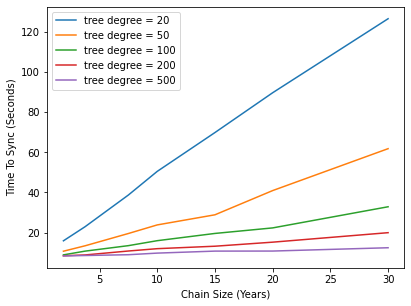

In [45]:
plt.plot(slc_chain_size_20, slc_tos_20, label ='tree degree = 20')
plt.plot(slc_chain_size_50, slc_tos_50, label ='tree degree = 50')
plt.plot(slc_chain_size_100, slc_tos_100, label ='tree degree = 100')
plt.plot(slc_chain_size_200, slc_tos_200, label ='tree degree = 200')
plt.plot(slc_chain_size_500, slc_tos_500, label ='tree degree = 500')


plt.xlabel('Chain Size (Years)')
plt.ylabel('Time To Sync (Seconds)')
# plt.xlim((0, 4e6))
# plt.xscale('log')
# plt.ylim((0, 60))
plt.legend()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.show()